<a href="https://colab.research.google.com/github/mahmud-nobe/Physics_Simulation_Tutorial/blob/main/wave_equation/Wave_Equation_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Report Summary

## Introduction

In this paper, I analyzed and simulated the wave equation, which is second order linear partial differential Equation (PDE). I used the finite difference method, specifically the centered difference method to approximate the wave equation. A physical example of 1D wave equation is a wave propagating through a rope of fixed length. For 1D wave equation, I simulated the following two test cases: Square pulse, and standing wave. 2D wave equation can be used to represent the wave propagating on a surface of a water body. I also simulated two cases for 2D wave equation: one, with a gaussian packet at the center, and second, with a gaussian packet along with a sinusoidal wave.

## Problem Definition: Wave Equation

Wave equation is a linear second order PDE. Second order means we have second derivative in the equation and linear means the heighest power of our variable(s) is 1. 

The simple wave equation is expressed as the following form:
\begin{align*}
    \frac{\partial^2 u}{\partial t^2} &= c^2 \nabla^2 u\\
    \text{For 1D, } \frac{\partial^2 u}{\partial t^2} &= c^2 \frac{\partial^2 u}{\partial x^2}\\
    \Rightarrow u_{tt} &= c^2 u_{xx}\\
    \text{For 2D, } \frac{\partial^2 u}{\partial t^2} &= c^2 \left(\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial x^2}\right)\\
    \Rightarrow u_{tt} &= c^2 (u_{xx} + u_{yy})
\end{align*}
Here, x and y are the points in the (1D or 2D)space and $u(x,y,t)$ is the vertical position of the point $(x,y)$.

In addition to the equation, we also need the initial condition (IC) and the boundary condition (BC) to solve the PDE. 

For 1D wave equation in a finite rope of length L, we know,
* (IC) The vertical position of all points in x at initial time: $u(t = 0, x = x)$
* (IC) The velocity of all points in x at initial time: $u_t(t = 0, x = x)$
* (BC) The vertical position of the boundary points at all time: $u(t = t, x = 0)$, $u(t = t, x = L)$.

By solving the wave equation, we want to know the position of all points at any time,
$u(t,x)$

For 2D wave equation in a finite surface of area $(Lx \times Ly)$, we know,
* (IC) The vertical position of all points in x,y at initial time: $u(t = 0, x = x, y=y)$
* (IC) The velocity of all points in x,y at initial time: $u_t(t = 0, x = x, y=y)$
* (BC) The vertical position of the boundary points at all time: $u(t = t, x = 0, y=0)$, $u(t = t, x = L, y=0)$, $u(t = t, x = 0, y=L)$, $u(t = t, x = L, y=L)$

By solving the wave equation, we want to know the position of all points at any time,
$u(t,x,y)$

## Finite Difference Method 

In order to solve the equation numerically, we need to use finite difference method. First we need to discretize the system into finite time steps and finite grid.

We can denote the vertical position of the point $x=j$ at time $t=i$ as, $u_{i,j}$.

Now we can approximate the derivatives using the finite difference methods.

I used the second order central difference method for both time axis and the x-axis, which is a method of order 2, i.e. error is $O(h^2)$. We can get the second order central difference using the first order forward difference method.

First order forward difference:

\begin{align*}
    u_t(i,j) &= \frac{u_{i+1, j} - u_{i, j}}{\Delta t}
\end{align*}

Second order central difference:

\begin{align*}
    u_{tt}(i,j) &= \frac{u_{t (i+1, j)} - u_{t(i, j)}}{\Delta t}\\
    &= \frac{\frac{u_{i+1, j} - u_{i, j}}{\Delta t} - \frac{u_{i, j} - u_{i-1, j}}{\Delta t}}{\Delta t}\\
    &= \frac{u_{i+1, j} - 2u_{i, j} + u_{i-1, j}}{\Delta t^2}
\end{align*}

Similarly,
\begin{align*}
    u_{xx}(i,j) &= \frac{u_{i, j+1} - 2u_{i, j} + u_{i, j-1}}{\Delta x^2}
\end{align*}

The wave equation,

\begin{align*}
    u_{tt}(i,j) &= c^2 u_{xx} \\
    \frac{u_{i+1, j} - 2u_{i, j} + u_{i-1, j}}{\Delta t^2} &= c^2 \frac{u_{i, j+1} - 2u_{i, j} + u_{i, j-1}}{\Delta x^2}\\
    u_{i+1, j} &= c^2 \frac{\Delta t^2}{\Delta x^2} (u_{i, j+1} - 2u_{i, j} + u_{i, j-1}) + 2u_{i, j} - u_{i-1, j}\\
    &= - u_{i-1, j} + 2u_{i, j} + \alpha^2 (u_{i, j+1} - 2u_{i, j} + u_{i, j-1}) 
    &= - u_{i-1, j} + 2(1-\alpha^2) u_{i,j} + \alpha^2 (u_{i,j+1}, u_{i,j-1})
\end{align*}
Here we replaced $c \frac{\Delta t}{\Delta x}$ by $\alpha$. 


Now one problem is, in order to know the position in the next timestep, we need to know the information of previous two time steps. But at first we only know the position for the initial timesteps (i=0).

We can use the information of the initial velocity to approximate the positions for the first timesteps (i=1)

We cannot use the forward difference method, as it is of order 1, $O(h)$. If we use this for the first time, then the overall order of our simulation will come down to $O(h)$. So we will use the order-2 first order finite difference methods: central difference method:

\begin{align*}
    u_t(i,j) &= \frac{u_{i+1, j} - u_{i-1, j}}{2\Delta t}\\
    u_t(0,j) &= \frac{u_{1, j} - u_{-1, j}}{2\Delta t}\\
    u_{-1, j} &= u_{1, j} - 2\Delta t \cdot u_t(0,j)\\
\end{align*}

Using this we can say that,
\begin{align*}
    u_{1,j} &= - u_{1, j} + 2\Delta t \cdot u_t(0,j) + 2(1-\alpha^2) u_{i,j} + \alpha^2 (u_{i,j+1}, u_{i,j-1})\\
    &=  u_t(0,j) \cdot \Delta t  + (1-\alpha^2) u_{i,j} + 0.5 \cdot \alpha^2 (u_{i,j+1}, u_{i,j-1})\\
\end{align*}

This will be used to find the positions in first time step. Then after that, we can use the value of the previous two timesteps to find the next time steps.


Using similar approach, we can find the update equation for 2D wave equation as follows:
\begin{align*}
    u_{i+1, j, k} &= - u_{i-1, j, k} + 2(1-\alpha^2) u_{i,j,k} + \alpha^2 (u_{i,j+1,k}, u_{i,j-1,k} + u_{i,j,k+1}, u_{i,j,k-1})
\end{align*}
Here $\alpha = c \frac{\Delta t}{\Delta x} = c \frac{\Delta t}{\Delta y}$.
So the grid size have to similar for both x and y axis.

Another important point to note is that, using the von Neumann stability analysis, we can find that the amplification factor of the error term for our 1D model is,
\begin{align*}
    g(k) = 1-2\alpha^2 sin^2\left(\frac{k\Delta x}{2}\right)
\end{align*}
As $\sin^2\theta$ can have a maximum value of 1, the stability condition is,
\begin{align*}
    -1\leq 1-2\alpha^2 \ leq 1\\
    \therefore \alpha = \frac{c\Delta t}{\Delta x} \leq 1
\end{align*}

## Simulation Choices

I made class for the wave with necessary attributes. I made a separate method for initialization so that we can reset the initial condition when necessary. The boundary condition is run after every update. The update is done using the above mentioned formula. 

As an attribute I used nx, ny instead of dx,dy, because I need my nx and ny to be imteger. So from my nx and ny value, I got the dx and dy value.

## Result and Discussion

Note that the animations are attached with the zip file.

**1D: Square wall**



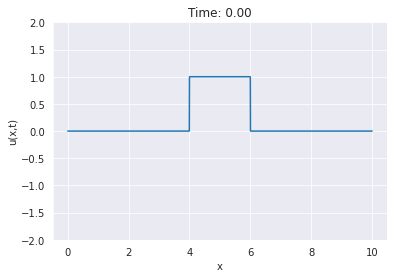

In [ ]:
wave = wave_equation_solver()

wave.initialize(square_wall, zero_velocity)
wave.visualize()

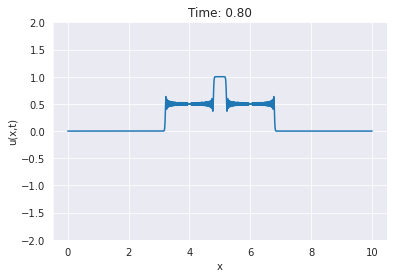

In [ ]:
wave.update(700)
wave.visualize()

As expected, the square pulse is going both side with a half amplitute, then they are reflecting back from the boundary.

**Standing wave:**
For each section, we should get two separate wave moving right and left. But the initial condition is such that the left and right wave creates some fixed position and an standing wave where only the amplitutes are changing over time.



**2D Wave**
For both system, we can see the reflecting back from the boundary. Thus the wave is scattered around the whole surface eventually and the vertical position in decreasing.

## LO Appendix

_#PhysicsTheory:_ I explained the wave equation and how we can use finite difference method to solve the system numerically. I also showed how the simulated system behaves compared to the analytical solution.

_#PhysicsApplication:_ I choose two test examples for 1D and 2D, which resembles the rope and surface wave in real life. The two test cases are simple enough to understand whether the simulation is working but complex enough to provide very useful informations.

_#PhysicsSimulation:_ I made classes for simulating 1D and 2D wave, made the animation to clearly show how the systems behave over time. The 2D system is visualized using imshow which is a good choice for such 3D data visualization.

# Appendix: Codes

## 1D wave equation

### Wave Class

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
class wave_equation_solver:

    def __init__(self, L = 10, c = 1, dt = 0.001, nx = 2000):
        self.L = L
        self.c = c
        self.nx = nx
        self.dx = self.L/self.nx
        self.dt = dt
        self.xs = np.arange(0, self.L+self.dx, self.dx)
        self.alpha = self.c*self.dt/self.dx

    def initialize(self, u_t0, ut_t0):
        u_zero = u_t0(self.xs, self.L)
        ut_zero = ut_t0(self.xs)
        
        self.u_s = [u_zero]
        self.set_boundary()

        u_first = ut_zero * self.dt + (1 - self.alpha**2) * u_zero + \
                    0.5*self.alpha**2 * (np.roll(u_zero, 1) + np.roll(u_zero, -1))
        self.u_s.append(u_first)
        self.set_boundary() 

        self.ts = [0, self.dt]

    def set_boundary(self):
        self.u_s[-1][0] = 0
        self.u_s[-1][-1] = 0

    def update(self, n=10):
        for _ in range(n):
            u_next_t = - self.u_s[-2] + 2*(1 - self.alpha**2) * self.u_s[-1] + \
                        self.alpha**2 * (np.roll(self.u_s[-1] , 1) + np.roll(self.u_s[-1], -1))

            self.u_s.append(u_next_t)
            self.set_boundary()

            self.ts.append(self.ts[-1]+self.dt)

    def visualize(self):
        plt.plot(self.xs, self.u_s[-1])
        plt.title(f'Time: {self.ts[-1]:0.2f}')
        plt.xlabel('x')
        plt.ylabel('u(x,t)')
        plt.ylim(-2, 2)
        plt.show()

In [ ]:
def square_wall(x, L):
    grid = []
    for i in x:
        if i >= (L/2) - (L/10) and i <= (L/2) + (L/10):
            grid.append(1)
        else:
            grid.append(0)
    return np.array(grid) 

def standing_wave(x, L, k = 3, A = 1):
    grid = [A*np.sin(np.pi * k*i/L) for i in x]
    return np.array(grid)

def zero_velocity(x):
    return np.zeros_like(x)

### Square Wall

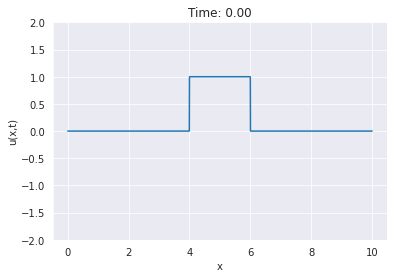

In [ ]:
wave = wave_equation_solver()

wave.initialize(square_wall, zero_velocity)
wave.visualize()

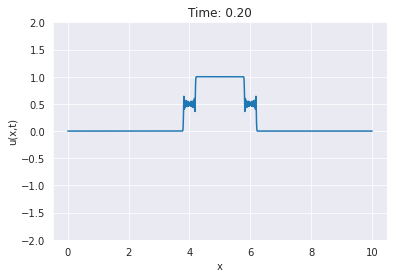

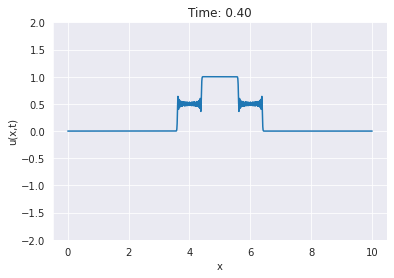

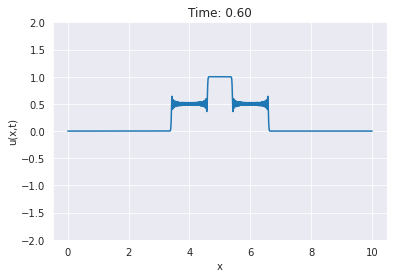

In [ ]:
for _ in range(3):
    wave.update(n=200)
    wave.visualize()

**Animation**

In [ ]:
from IPython.display import HTML
import matplotlib.animation as animation

#############
# ANIMATION #
#############

#%matplotlib notebook

def make_animation(wave, n_update = 10, n_animate = 1000, interval = 30):
    sns.set_style('darkgrid')
    sns.set(font_scale = 1.1)

    # create figure, axis, and lines for drawing
    lines  = [None]
    fig    = plt.figure(figsize =(10,8))
    ax     = plt.subplot(xlim = (-0.5, wave.L*1.05), ylim = (-1.5,1.5))
    

    # initialize lines to certain values
    lines[0], = ax.plot(wave.xs, wave.u_s[-1])  

    #ax.set_xticks([])
    #ax.set_yticks([])
    ax.plot(wave.xs, wave.u_s[0], ls = 'dotted', linewidth = 2, 
            label = 'initial value')
    ax.plot([0,wave.L], [0,0], 'o', color = 'red')
    ax.set_title(f'1D Wave, Time = {wave.ts[-1]:0.2f}')
    ax.set_xlabel('x')
    ax.set_ylabel('u (x,t)')
    

    def animate(i):
        wave.update(n=n_update)
        lines[0].set_data(wave.xs, wave.u_s[-1])
        ax.set_title(f'1D Wave, Time = {wave.ts[-1]:0.2f}')
        return lines
        
        
    # starts animation
    ani = animation.FuncAnimation(fig, animate, np.arange(1, n_animate), 
                                  interval = interval, blit = True)
    return ani

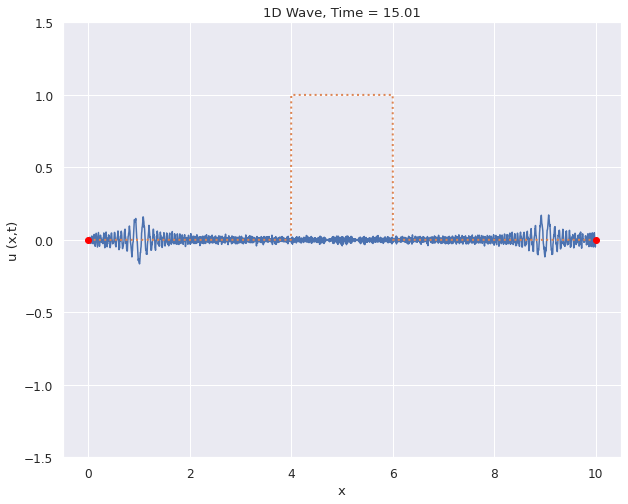

In [ ]:
wave = wave_equation_solver()
wave.initialize(square_wall, zero_velocity)

ani = make_animation(wave)
HTML(ani.to_html5_video())

### Standing Wave

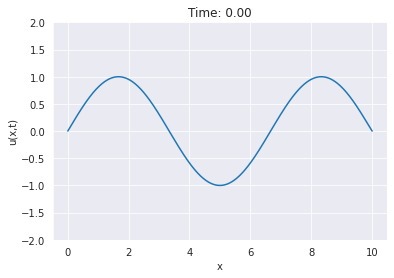

In [ ]:
wave = wave_equation_solver()

wave.initialize(standing_wave, zero_velocity)
wave.visualize()

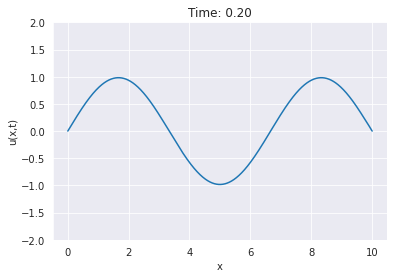

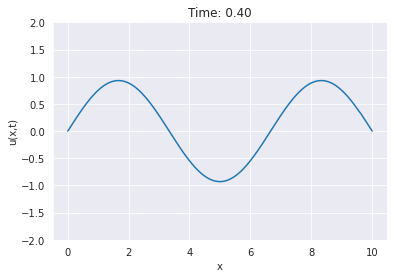

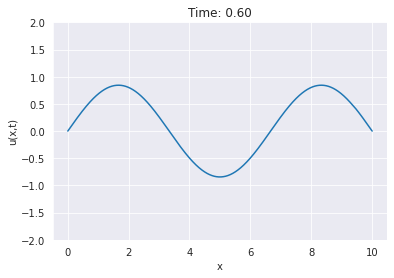

In [ ]:
for _ in range(3):
    wave.update(n=200)
    wave.visualize()

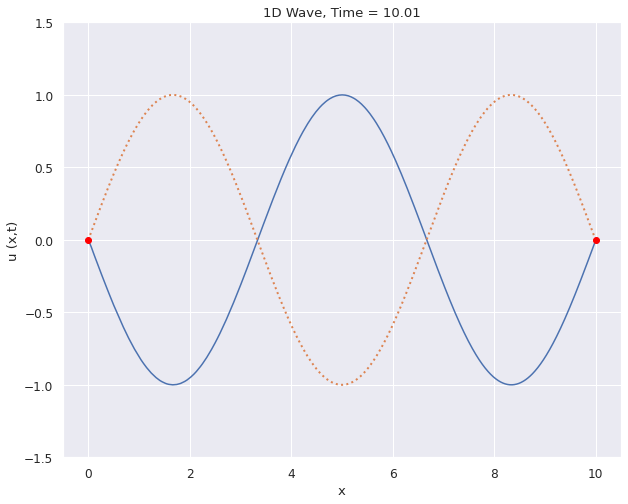

In [ ]:
wave = wave_equation_solver()
wave.initialize(standing_wave, zero_velocity)

ani = make_animation(wave)
HTML(ani.to_html5_video())

### Comparing with Analytical Solution

In [ ]:
def exact_solution(t, x = 5, L = 10, k = 3, c=1):
    u = 0.5 * np.sin(np.pi * k * (x-c*t)/L) +\
    0.5 * np.sin(np.pi * k * (x+c*t)/L)
    return u

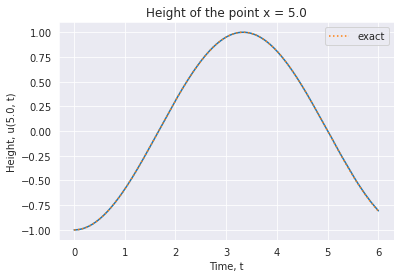

In [ ]:
wave = wave_equation_solver()
wave.initialize(standing_wave, zero_velocity)

wave.update(n = 6000)

ind = int(len(wave.xs)/2)
x = wave.xs[ind]
simulation_value = np.array(wave.u_s)[:, ind]
exact = exact_solution(wave.ts, L=wave.L, x = x)

plt.plot(wave.ts, simulation_value)
plt.title(f'Height of the point x = {x:0.1f}')
plt.plot(wave.ts, exact, ':', label = 'exact')
plt.xlabel('Time, t')
plt.ylabel(f'Height, u({x:0.1f}, t)')
plt.legend()
plt.show()

## 2D wave equation solver

### Wave Class

In [ ]:
class wave_equation_solver_2D:

    def __init__(self, Lx = 2, Ly = 2, c = 1, dt = 0.005, 
                 nxy = 200):
        
        self.Lx = Lx
        self.Ly = Ly
        self.c = c
        self.nxy = nxy
        self.dxy = self.Lx/self.nxy
        self.dt = dt
        self.xs = np.arange(0, self.Lx+self.dxy, self.dxy)
        self.ys = np.arange(0, self.Ly+self.dxy, self.dxy)
        self.alpha = c*dt/self.dxy

    def initialize(self, u_t0, ut_t0):
        u_zero = u_t0(self.xs, self.ys, self.Lx, self.Ly)
        ut_zero = ut_t0(self.xs, self.ys)
        
        self.u_s = [u_zero]
        self.set_boundary()

        u_first = ut_zero * self.dt + (1 - 2*self.alpha**2) * u_zero + \
                    0.5*self.alpha**2 * (np.roll(u_zero, 1, axis=0) + 
                                         np.roll(u_zero, -1, axis=0) +
                                         np.roll(u_zero, 1, axis=1) + 
                                         np.roll(u_zero, -1, axis=1))
        self.u_s.append(u_first)
        self.set_boundary() 

        self.ts = [0, self.dt]

    def set_boundary(self):
        self.u_s[-1][0, :] = 0
        self.u_s[-1][-1, :] = 0
        self.u_s[-1][:, 0] = 0
        self.u_s[-1][:, -1] = 0

    def update(self, n=10):
        for _ in range(n):
            u_next_t = - self.u_s[-2] + 2*(1 - 2*self.alpha**2) * self.u_s[-1] + \
                        self.alpha**2 * (np.roll(self.u_s[-1], 1, axis=0) + 
                                         np.roll(self.u_s[-1], -1, axis=0) +
                                         np.roll(self.u_s[-1], 1, axis=1) + 
                                         np.roll(self.u_s[-1], -1, axis=1))

            self.u_s.append(u_next_t)
            self.set_boundary()

            self.ts.append(self.ts[-1]+self.dt)

    def visualize(self):
        plt.imshow(self.u_s[-1], extent=[0,self.Lx, 0, self.Ly])
        #plt.plot(self.xs, self.u_s[-1])
        plt.title(f'Time: {self.ts[-1]:0.2f}')
        plt.colorbar(label = 'u(x,y,t)')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.grid(False)
        plt.show()

In [ ]:
def wave_gaussian2d(x, y, Lx, Ly):
    """
    Gaussian wave centered in sheet of length Lx by Ly.
    f_init = e^(-((x - Lx/2)^2 + (y - Ly/2)) / 0.01) / 0.01
    """
    y, x = np.meshgrid(y, x)
    mu_x = 0.5 * Lx
    mu_y = 0.5 * Ly
    sigma = 0.1
    A = 100
    f = 100 * np.exp(-((x - mu_x)**2 + (y - mu_y)**2) / sigma**2)
    return f

def wave_gaussian_and_sine_2d(x, y, Lx, Ly):
    """
    Gaussian wave centered in sheet of length Lx by Ly.
    f_init = e^(-((x - Lx/2)^2 + (y - Ly/2)) / 0.01) / 0.01
    """
    y, x = np.meshgrid(y, x)
    mu_x = 0.5 * Lx
    mu_y = 0.5 * Ly
    sigma = 0.1
    A = 100
    f = 100 * np.exp(-((x - mu_x)**2 + (y - mu_y)**2) / sigma**2) *\
    np.sin(2*np.pi * x) * np.sin(2*np.pi*y)
    return f

def zero_velocity2D(x, y):
    xx, yy = np.meshgrid(x,y)
    return np.zeros_like(xx)

### Gaussian Packet

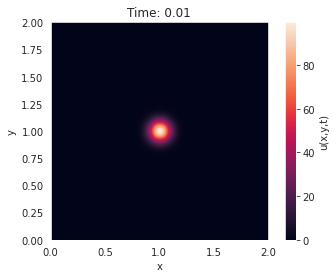

In [ ]:
wave2D = wave_equation_solver_2D()

wave2D.initialize(wave_gaussian2d, zero_velocity2D)
wave2D.visualize()

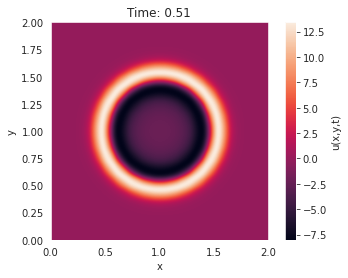

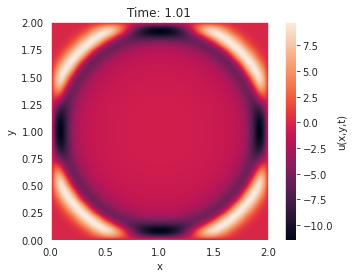

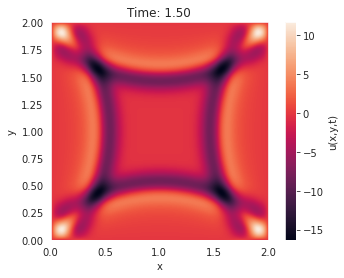

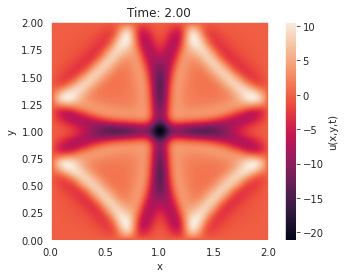

In [ ]:
for _ in range(4):
    wave2D.update(n=100)
    wave2D.visualize()

In [ ]:
from IPython.display import HTML
import matplotlib.animation as animation
from mpl_toolkits.axes_grid1 import make_axes_locatable

#############
# ANIMATION #
#############

#%matplotlib notebook
def make_animation_2d(wave2D, n_update = 20, n_animate = 50, interval = 250,
                      imshow_vmin = -10, imshow_vmax = 10):
    # create figure, axis, and lines for drawing
    fig    = plt.figure(figsize =(8,6))
    ax     = plt.subplot()

    # colorbar axis
    div = make_axes_locatable(ax)
    cax = div.append_axes('right', '5%', '5%')

    # initialize lines to certain values
    im = ax.imshow(wave2D.u_s[-1], extent=[0,wave2D.Lx, 0, wave2D.Ly],
                   vmin= imshow_vmin, vmax = imshow_vmax, cmap = 'seismic')
    cb = fig.colorbar(im, cax = cax, label = 'u(x,y,t)', ax=ax)
    
    ax.set_title(f'Time: {wave2D.ts[-1]:0.2f}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    sns.set(font_scale = 1.1)
    ax.grid(False)

    def animate(i):
        wave2D.update(n=n_update)
        im.set_array(wave2D.u_s[-1])

        ax.set_title(f'2D Wave, Time = {wave2D.ts[-1]:0.2f}')
        return [im]
        
        
    # starts animation
    ani = animation.FuncAnimation(fig, animate, np.arange(1, n_animate), 
                                  interval = interval, blit = True)
    return ani

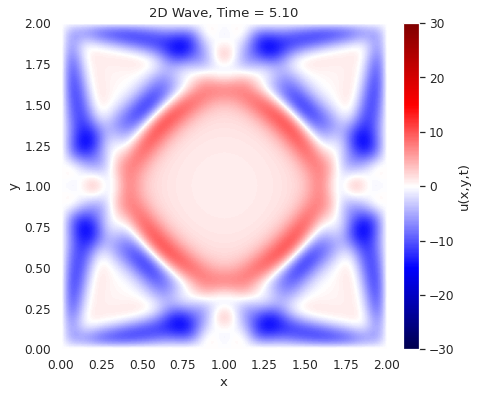

In [ ]:

wave2D = wave_equation_solver_2D()
wave2D.initialize(wave_gaussian2d, zero_velocity2D)

ani = make_animation_2d(wave2D, n_animate=50, 
                        imshow_vmax=30, imshow_vmin=-30)
HTML(ani.to_html5_video())

### Gaussian packet with sine waves

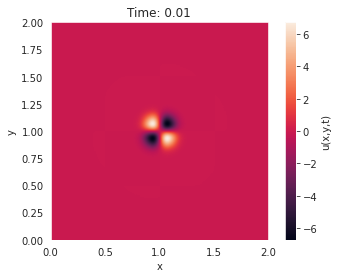

In [ ]:
wave2D = wave_equation_solver_2D()
wave2D.initialize(wave_gaussian_and_sine_2d, zero_velocity2D)
wave2D.visualize()

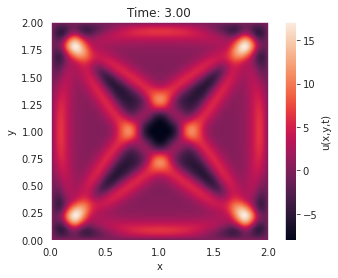

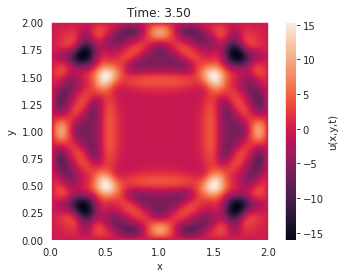

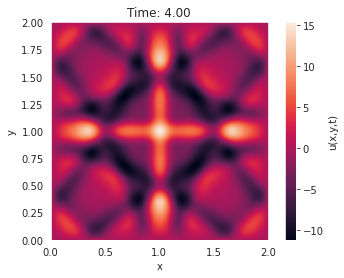

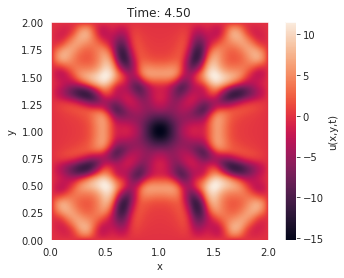

In [ ]:
for _ in range(4):
    wave2D.update(n=100)
    wave2D.visualize()

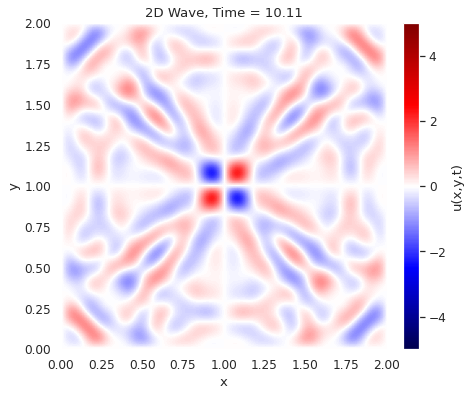

In [ ]:
wave2D = wave_equation_solver_2D()
wave2D.initialize(wave_gaussian_and_sine_2d, zero_velocity2D)

ani = make_animation_2d(wave2D, n_animate=100, 
                        imshow_vmax = 5, imshow_vmin = -5)
HTML(ani.to_html5_video())

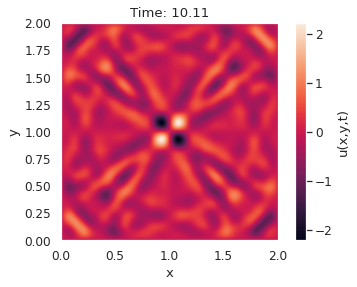

In [ ]:
wave2D.visualize()